Cho DataSet lấy từ file D89.csv của các hộ gồm các trường sau:

- MaThua: Mã thửa đất
- ChieuDai: Chiều dài của lô đất (m)
- ChieuRong: Chiều rộng của lô đất (m)
- LoaiDat: [Loại đất
1: Đất thương mại,
2: Đất vĩnh viễn,
x (x là số năm): Đất có thời hạn]

Câu 1 (3.0 điểm)
- a. Đọc dữ liệu file trên vào DataFrame có tên df và hiển thị:

5 dòng đầu tiên,
5 dòng ngẫu nhiên,
Kích thước df,
Số dòng df,
Số cột df
- b. Thống kê có bao nhiêu lô đất thương mại và đất vĩnh viễn. Vẽ biểu đồ pie minh họa.

- c. Tính giá trị trung bình (mean) của diện tích cho các lô đất có thời hạn trên 20 năm.

In [7]:
# cau a
import pandas as pd
df = pd.read_csv("D89.csv")
print("5 dòng đầu tiên")
print(df.head())
print("5 dòng ngẫu nhiên")
print(df.sample(5))
print("Kích thước")
print(df.shape)
print("Số dòng")
print(df.shape[0])
print("Số cột")
print(df.shape[1])


5 dòng đầu tiên
  MaThua  ChieuDai  ChieuRong  LoaiDat
0   T001        11         26        2
1   T002        18         13        1
2   T003        37         14        1
3   T004        29         14        2
4   T005        24         29        1
5 dòng ngẫu nhiên
   MaThua  ChieuDai  ChieuRong  LoaiDat
7    T008        17         30       12
12   T013        10          6        2
5    T006        11          5       33
17   T018        24         30        1
10   T011        17         20        5
Kích thước
(20, 4)
Số dòng
20
Số cột
4


Có 7 đất thương mại
Có 6 đất vĩnh viễn


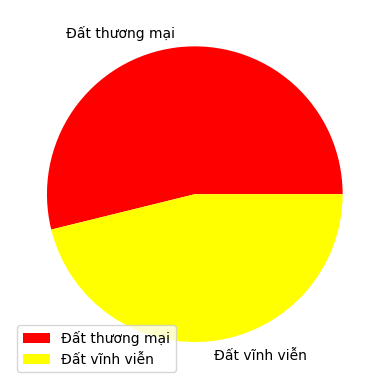

In [9]:
# câu b
dat_thuong_mai = df[df['LoaiDat'] == 1]['LoaiDat'].count()
dat_vinh_vien = df[df['LoaiDat'] == 2]['LoaiDat'].count()
print("Có " + str(dat_thuong_mai) + " đất thương mại")
print("Có " + str(dat_vinh_vien) + " đất vĩnh viễn")

import matplotlib.pyplot as plt
plt.pie([dat_thuong_mai, dat_vinh_vien], labels=['Đất thương mại', 'Đất vĩnh viễn'], colors=['red', 'yellow'])
plt.legend()
plt.show()

Nhận xét: 
- Phần đa chiếm về đất thương mại , đất vĩnh viễn ít hơn một chút

In [11]:
# câu c
trung_binh_dien_tich_hon_20_nam = (df[df['LoaiDat'] > 20]['ChieuDai'] * df[df['LoaiDat'] > 20]['ChieuRong']).mean()
print("Trung bình diện tích hơn 20 năm: ", trung_binh_dien_tich_hon_20_nam)

Trung bình diện tích hơn 20 năm:  500.0


Câu 2 (2.0 điểm)
Chèn thêm cột TienDat (triệu đồng) với quy tắc:

- Đất thương mại: TienDat = (ChieuDai x ChieuRong) x 5
- Đất vĩnh viễn: TienDat = (ChieuDai x ChieuRong) x (ChieuDai + ChieuRong)
- Đất có thời hạn: Ghi "Không xác định giá trị"

In [13]:
def tinhTienDat(row):
    if row['LoaiDat'] == 1:
        return row['ChieuDai'] * row['ChieuRong'] * 5
    elif row['LoaiDat'] == 2:
        return (row['ChieuDai'] * row['ChieuRong']) * (row['ChieuDai'] + row['ChieuRong'])
    else:
        return "Không xác định giá trị"
df['TienDat'] = df.apply(tinhTienDat, axis=1)
print(df)

   MaThua  ChieuDai  ChieuRong  LoaiDat                 TienDat
0    T001        11         26        2                   10582
1    T002        18         13        1                    1170
2    T003        37         14        1                    2590
3    T004        29         14        2                   17458
4    T005        24         29        1                    3480
5    T006        11          5       33  Không xác định giá trị
6    T007        22          9        1                     990
7    T008        17         30       12  Không xác định giá trị
8    T009        36         11       18  Không xác định giá trị
9    T010        31         13        1                    2015
10   T011        17         20        5  Không xác định giá trị
11   T012        29         27       38  Không xác định giá trị
12   T013        10          6        2                     960
13   T014        10          5        2                     750
14   T015        27          6       29 

Câu 3 (2.0 điểm)
Chèn thêm cột ChuyenDoi (Chuyển đổi đất) với quy tắc:

<li>Đất thương mại (LoaiDat = 1): ChuyenDoi = (ChieuDai x ChieuRong) x 12 (triệu đồng)</li>
<li>Các loại đất khác: "Chưa có công văn"</li>
<li>Trích lọc ra các lô đất được phép chuyển đổi.</li>



In [17]:
def chuyenDoiDat(row):
    if row['LoaiDat'] == 1:
        return row['ChieuDai'] * row['ChieuRong'] * 12
    else:
        return "Chưa có công văn"
df['ChuyenDoi'] = df.apply(chuyenDoiDat, axis=1)

print(df[df['ChuyenDoi'] != "Chưa có công văn"])


   MaThua  ChieuDai  ChieuRong  LoaiDat TienDat ChuyenDoi
1    T002        18         13        1    1170      2808
2    T003        37         14        1    2590      6216
4    T005        24         29        1    3480      8352
6    T007        22          9        1     990      2376
9    T010        31         13        1    2015      4836
17   T018        24         30        1    3600      8640
18   T019        21         28        1    2940      7056
int64


Câu 4 (3.0 điểm)
- a. Giả sử Diện tích có phân phối chuẩn. Hãy xây dựng hàm mật độ xác suất cho Diện tích.

- b. Vẽ đồ thị phân phối chuẩn cho Diện tích. Điều chỉnh xlim, ylim phù hợp.

- c. Tính tỷ lệ (%) số lô đất có Diện tích dưới 200 m².

In [19]:
# a. 
import scipy.stats as stats
def ham_phan_phoi_mat_do(x, mean, std):
    return stats.norm.pdf(x, mean, std)
mean_dien_tich = (df['ChieuDai'] * df['ChieuRong']).mean()
std_dien_tich = (df['ChieuDai'] * df['ChieuRong']).std()

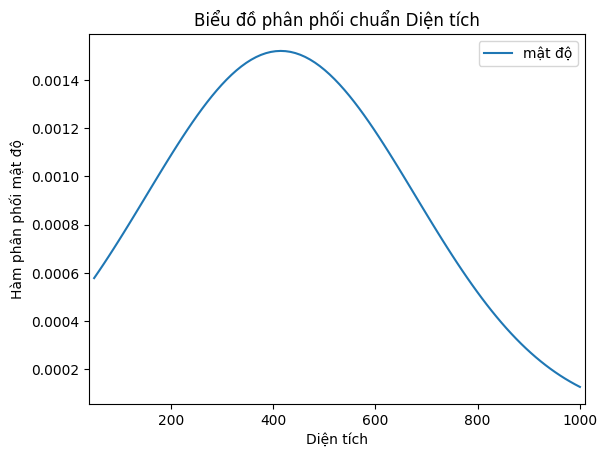

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace((df['ChieuDai'] * df['ChieuRong']).min(), (df['ChieuDai'] * df['ChieuRong']).max(), 100)
y = ham_phan_phoi_mat_do(x, mean_dien_tich, std_dien_tich)

plt.plot(x, y, label=['mật độ'])
plt.xlim((df['ChieuDai'] * df['ChieuRong']).min() - 10, (df['ChieuDai'] * df['ChieuRong']).max() + 10)
plt.title("Biểu đồ phân phối chuẩn Diện tích")
plt.xlabel("Diện tích")
plt.ylabel("Hàm phân phối mật độ")
plt.legend()
plt.show()

Nhận xét: 
- Từ biểu đồ ta thấy phân phối diện tại 400 là cao nhất 
- trước giá trị cực đại là tăng lên 
- sau giá trị cực đại là giảm xuống 


In [38]:
# c 
ty_le = stats.norm.cdf(200, mean_dien_tich, std_dien_tich)
print("Tỷ lệ diện tích dưới 200m^2: ", ty_le)

Tỷ lệ diện tích dưới 200m^2:  0.20636331484024062
